In [ ]:
pip show scikit-learn 

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
%matplotlib inline 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_regression
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [7]:
df = pd.read_csv('cardata.csv') 
df.columns = df.columns.str.lower().str.replace(' ', '_')  
string_columns = list(df.dtypes[df.dtypes == 'object'].index)  
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')  
df.head()


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [8]:
cat_data = ['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels','market_category', 'vehicle_size', 'vehicle_style']
for col in cat_data: df[col] = df[col].fillna('')
df = df.fillna(0)   

df['age'] = 2017 - df['year']
del df['year']

df.head() 


,make,model,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,age
0,bmw,1_series_m,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135,6
1,bmw,1_series,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650,6
2,bmw,1_series,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350,6
3,bmw,1_series,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450,6
4,bmw,1_series,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500,6


<AxesSubplot:>

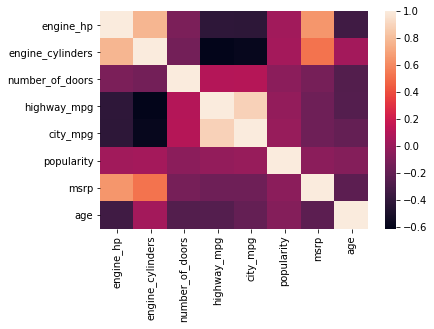

In [10]:
sns.heatmap(df.corr())

C:\Users\timko\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='engine_hp', ylabel='Density'>

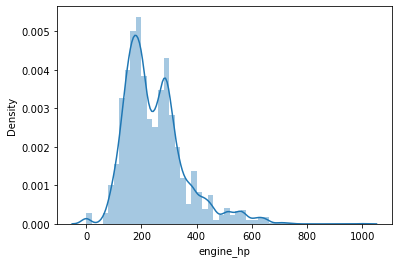

In [11]:
sns.distplot(df.engine_hp)

<AxesSubplot:xlabel='msrp', ylabel='engine_hp'>

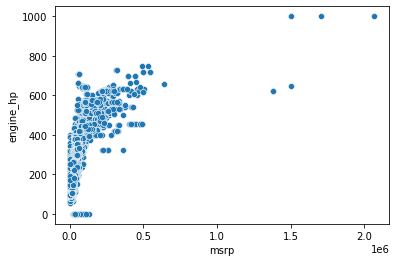

In [13]:
sns.scatterplot(x='msrp', y='engine_hp', data=df, palette='Blues')

-25.0
495.0


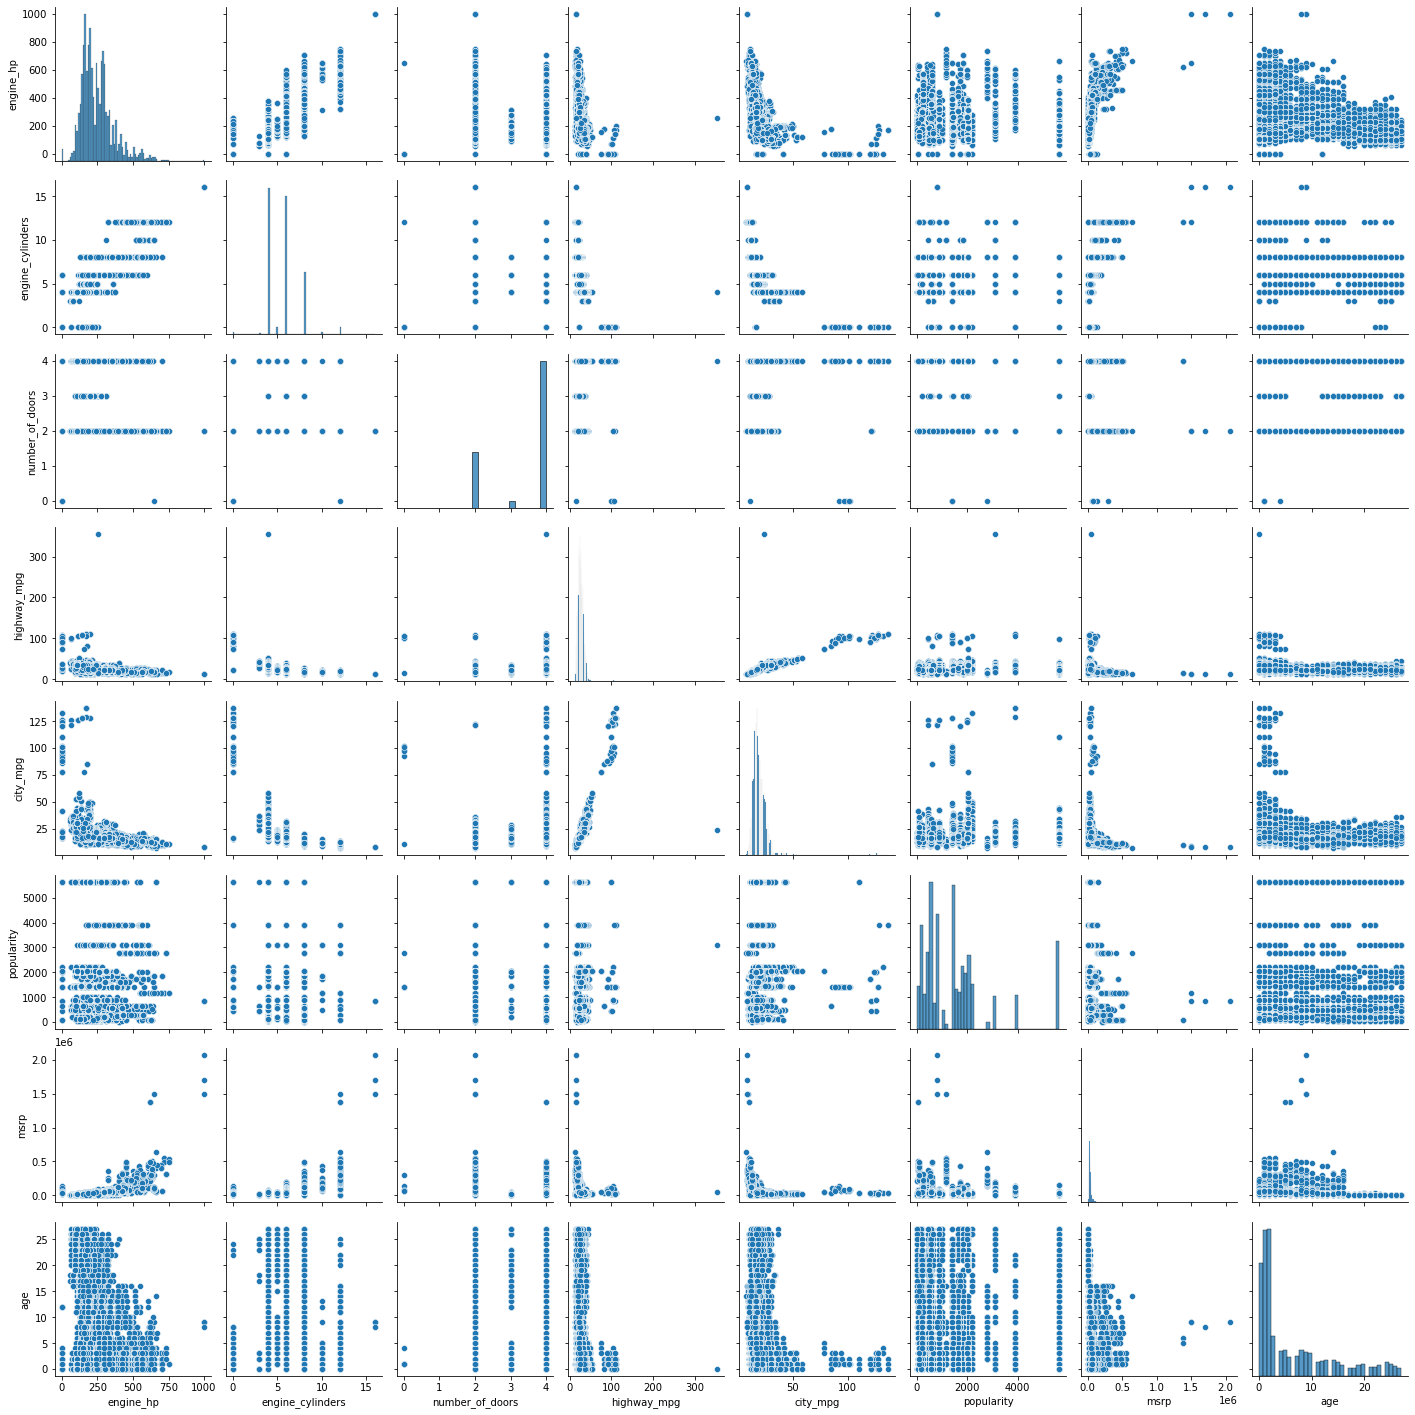

In [14]:
sns.pairplot(df)

In [22]:
def norm(df, col):
    quartiles = df[col].quantile([.25,.5,.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3-Q1
    lower_bound = Q1 - (1.5*IQR)
    upper_bound = Q3 + (1.5*IQR)
    print(lower_bound)
    print(upper_bound)

    df_std=df.loc[ df[col] <  upper_bound ]
    #sns.distplot(df_std[col])
    return df_std

In [24]:
df_clean=df

-10846.875
74078.125
-7.5
460.5
8.5
44.5
7.0
31.0


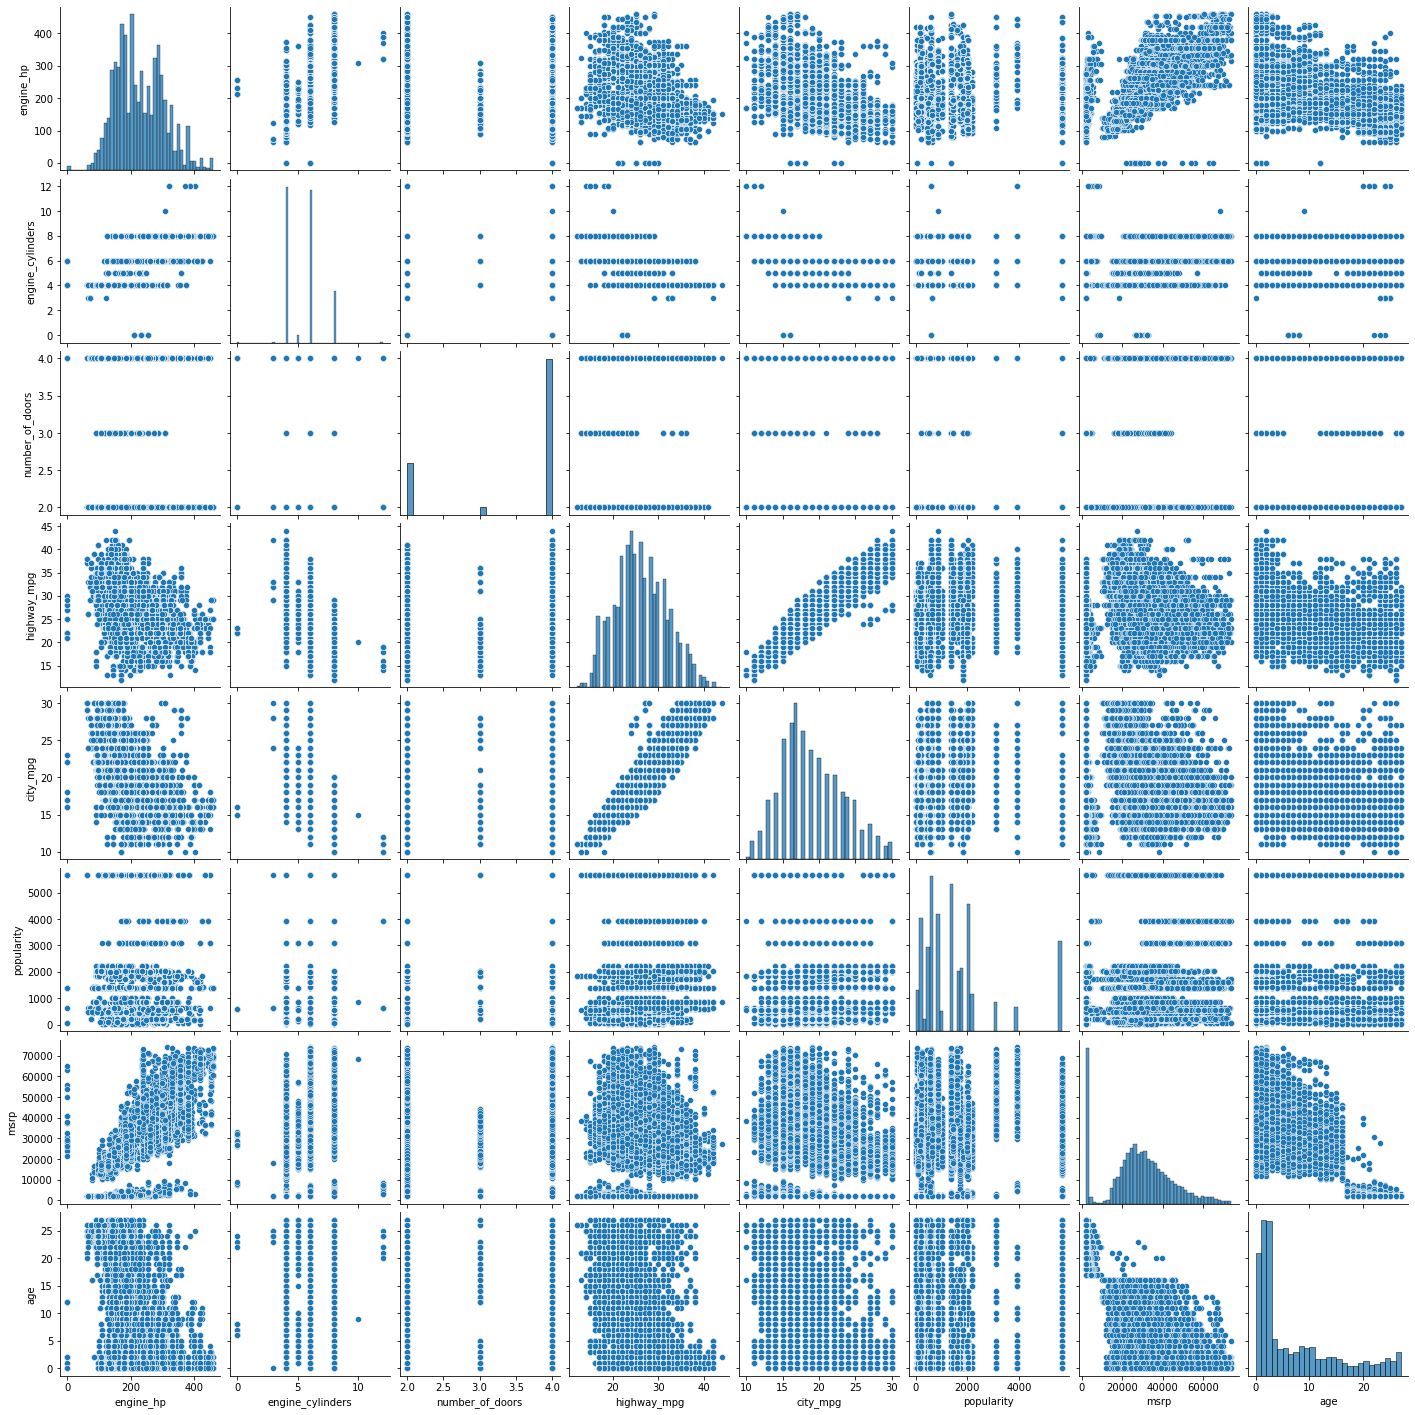

In [25]:
df = norm(df, 'msrp')
df = norm(df, 'engine_hp')
df = norm(df, 'highway_mpg')
df = norm(df, 'city_mpg')
sns.pairplot(df)

In [29]:
for col in cat_data:
    df = df.copy()
    dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(col, axis=1) 

for col in df.columns:
    df[col] = df[col].astype(int)

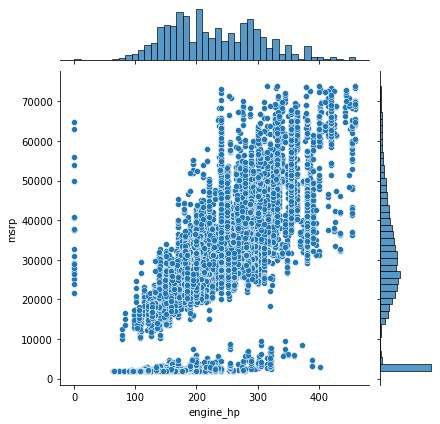

In [30]:

sns.jointplot(data=df, x="engine_hp", y="msrp")

In [31]:
df_train, df_test = train_test_split(df, test_size=0.33, random_state=40)
 

In [32]:

 
y_train = df_train.msrp.values
y_test = df_test.msrp.values
del df_train['msrp'] 
del df_test['msrp'] 

scaler = StandardScaler()
scaler.fit(df_train)

df_train = pd.DataFrame(scaler.transform(df_train), index=df_train.index, columns=df_train.columns)
df_test = pd.DataFrame(scaler.transform(df_test), index=df_test.index, columns=df_test.columns)

X_test = df_test.values 
X_train = df_train.values  
y_test

array([49295, 21345, 22550, ..., 25895, 21580,  2000])

In [33]:
models = {
    "                     Linear Regression": LinearRegression(),
    " Linear Regression (L2 Regularization) Ridge": Ridge(),
    " Linear Regression (L1 Regularization) Lasso": Lasso(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                        Neural Network": MLPRegressor(), 
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.") 
for name, model in models.items():
    print(name + " R^2 Score: {:.5f}".format(model.score(X_test, y_test)))    

                     Linear Regression trained.
 Linear Regression (L2 Regularization) Ridge trained.


C:\Users\timko\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8469963808.81176, tolerance: 178469060.83445165
  model = cd_fast.enet_coordinate_descent(


 Linear Regression (L1 Regularization) Lasso trained.


C:\Users\timko\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


                   K-Nearest Neighbors trained.
                        Neural Network trained.
                         Decision Tree trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                     Linear Regression R^2 Score: -96095119574199892443136.00000
 Linear Regression (L2 Regularization) Ridge R^2 Score: 0.94969
 Linear Regression (L1 Regularization) Lasso R^2 Score: 0.94961
                   K-Nearest Neighbors R^2 Score: 0.84292
                        Neural Network R^2 Score: 0.90542
                         Decision Tree R^2 Score: 0.95161
                         Random Forest R^2 Score: 0.96227
                     Gradient Boosting R^2 Score: 0.93038


In [34]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pred = model.predict(X_test)
df_pred = pd.DataFrame({ 'pred': pred, 'act': y_test, 'err': pred-y_test  })
df_pred

0.9614617619164966


,pred,act,err
0,54970.204167,49295,5675.204167
1,21143.223333,21345,-201.776667
2,22968.960000,22550,418.960000
3,26427.226893,24375,2052.226893
4,23096.747917,20995,2101.747917
...,...,...,...
3437,30391.818701,30695,-303.181299
3438,56530.806667,64300,-7769.193333
3439,27827.712662,25895,1932.712662
3440,22438.665000,21580,858.665000


In [37]:
df_pred.describe()

,pred,act,err
count,3442.000000,3442.000000,3442.000000
mean,28559.585437,28616.371005,-56.785568
std,15727.678668,16075.221346,3155.241070
min,2000.000000,2000.000000,-22408.336905
25%,20354.843611,19995.000000,-1576.132027
50%,28836.052857,28545.000000,0.000000
75%,37993.533333,38115.000000,1590.725179
max,71097.850000,73645.000000,12447.814167


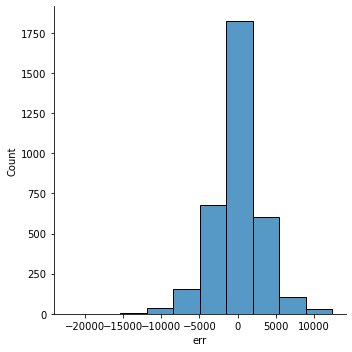

In [40]:

sns.displot(df_pred, x="err", bins=10)

In [ ]:
def label_encoding:
    cat_data = ['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels','market_category', 'vehicle_size', 'vehicle_style']
    for col in cat_data:
        df[col] = df[col].fillna('')
    df = df.fillna(0)   
    labelencoder = LabelEncoder()# Assigning numerical values and storing in another column
    for c in cat_data:
        df[c+'_cat'] = labelencoder.fit_transform(df[c])
        del df[c]
    df['age'] = 2017 - df['year']
    del df['year']
    for col in df.columns:
        df[col] = df[col].astype(int)
    df

In [ ]:
#sns.distplot(df.msrp, kde=False)

In [ ]:
#sns.distplot(df.msrp[df.msrp < 100000], kde=False)

In [ ]:
#log_price = np.log1p(df.msrp)
#sns.distplot(log_price, kde=False)

In [ ]:
#df.isnull().sum()

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=32)
y_train = df_train.msrp.values
y_test = df_test.msrp.values
del df_train['msrp'] 
del df_test['msrp']  
X_test = df_test.values 
X_train = df_train.values  
len(y_test)

In [ ]:
models = {
    "                     Linear Regression": LinearRegression(),
    " Linear Regression (L2 Regularization)": Ridge(),
    " Linear Regression (L1 Regularization)": Lasso(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                        Neural Network": MLPRegressor(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")
    
for name, model in models.items():
    print(name + " R^2 Score: {:.5f}".format(model.score(X_test, y_test)))    

In [ ]:
#X_train, y_train = make_regression(n_samples=2000, n_features=10, random_state=0, noise=4, bias=100.0)
model = LinearRegression() 
model.fit(X_train, y_train) 
model.intercept_

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
pred = model.predict(X_train) 
r2 = r2_score(y_train, pred) 
print(f"R-squared (R2 ): {r2}") 

In [ ]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [ ]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)
y_train = df_train.msrp.values
y_val = df_val.msrp.values
del df_train['msrp']
del df_val['msrp'] 
del df_test['msrp'] 

In [ ]:
df_test

In [ ]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_num = df_train[base]

In [ ]:
df_num = df_num.fillna(0)
df_num

In [ ]:
X_train = df_num.values 

In [ ]:
model = LinearRegression()
reg = model.fit(X_train, y_train) 
reg.intercept_

In [ ]:
y_pred = reg.predict()

In [ ]:
sns.distplot(y_pred, label='pred')
sns.distplot(y_train, label='y')
plt.legend()